### Data loading and dataset creation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [16]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
heart_disease.shape

(303, 14)

In [17]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)
# Create y (the target column)
y = heart_disease["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

In [25]:
def print_shape(X_1, X_2, y_1, y_2):
    l = [X_1, X_2, y_1, y_2]
    for i,item in enumerate(l):
        print(l[i].shape)

this is a small dataset so proceeding only with train and test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state= 42)

In [26]:
print_shape(X_train, X_test, y_train, y_test)

(242, 13)
(61, 13)
(242,)
(61,)


In [10]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1) # 0.25 x 0.8 = 0.2
# print_shape(X_train, X_val, y_train, y_val)

## Baseline

Gaussian Naive Bayes

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def model_fit_score(model):
    print(f"Scores for {model}")
    model.fit(X_train,y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    # val_acc = accuracy_score(y_val, model.predict(X_val))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    print(f'Train Accuracy: {train_acc}')
    # print(f'Validation Accuracy: {val_acc}')
    print(f"Test accuracy: {test_acc}")
    print("")

In [30]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# gnb = GaussianNB()
# svm = svm.LinearSVC()
# sgd = SGDClassifier()
# rfc = RandomForestClassifier()
# lr = LogisticRegression()
# knn = KNeighborsClassifier()
# model_list =[gnb, svm, sgd, rfc, lr, knn]

# for model in model_list:
#     model_fit_score(model)

models_dict = {  "gnb" : GaussianNB(),
                "svm" : svm.LinearSVC(),
                "sgd" : SGDClassifier(),
                "rfc" : RandomForestClassifier(),
                "lr"  : LogisticRegression(max_iter=100),
                "KNN": KNeighborsClassifier()
              }

for name, model in models_dict.items():
    model_fit_score(model)

Scores for GaussianNB()
Train Accuracy: 0.8181818181818182
Test accuracy: 0.8688524590163934

Scores for LinearSVC()
Train Accuracy: 0.8553719008264463
Test accuracy: 0.8688524590163934

Scores for SGDClassifier()
Train Accuracy: 0.628099173553719
Test accuracy: 0.6557377049180327

Scores for RandomForestClassifier()
Train Accuracy: 1.0
Test accuracy: 0.8688524590163934

Scores for LogisticRegression()
Train Accuracy: 0.8636363636363636
Test accuracy: 0.8852459016393442

Scores for KNeighborsClassifier()
Train Accuracy: 0.7603305785123967
Test accuracy: 0.6885245901639344



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest Classifier for Classifying Heart Disease

In [31]:
clf = RandomForestClassifier()

#hyper parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
clf.fit(X= X_train, y = y_train)

RandomForestClassifier()

In [21]:
# This wont't work due incorrect shapes
y_label = clf.predict(np.array([0, 2, 3, 4]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
y_preds = clf.predict(X = X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## model evaluation

In [36]:
train_acc = accuracy_score(y_train, clf.predict(X_train))
print(f"traning accuracy is:{train_acc*100}%")
test_acc = accuracy_score(y_test, clf.predict(X_test))
print(f"Test accuracy is: {test_acc*100}%")


traning accuracy is:100.0%
Test accuracy is: 85.24590163934425%


In [37]:
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [38]:
#confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  5]
 [ 4 28]]


## Experiments to imporve model performance

In [39]:
np.random.seed(42)
train_accuracies = []
test_accuracies = []
n_estimators_range = range(100, 200, 10)

for i in n_estimators_range:
    print(f"Traying model with {i} esimators")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    #calulate train,test accuracy
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print(f"Model accuracy on train set: {model.score(X_train, y_train)*100}%")
    print(f"Model accuracy on test set: {model.score(X_test, y_test)*100}%")
    #store results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print("")

Traying model with 100 esimators
Model accuracy on train set: 100.0%
Model accuracy on test set: 83.60655737704919%

Traying model with 110 esimators
Model accuracy on train set: 100.0%
Model accuracy on test set: 85.24590163934425%

Traying model with 120 esimators
Model accuracy on train set: 100.0%
Model accuracy on test set: 83.60655737704919%

Traying model with 130 esimators
Model accuracy on train set: 100.0%
Model accuracy on test set: 81.9672131147541%

Traying model with 140 esimators
Model accuracy on train set: 100.0%
Model accuracy on test set: 86.88524590163934%

Traying model with 150 esimators
Model accuracy on train set: 100.0%
Model accuracy on test set: 85.24590163934425%

Traying model with 160 esimators
Model accuracy on train set: 100.0%
Model accuracy on test set: 86.88524590163934%

Traying model with 170 esimators
Model accuracy on train set: 100.0%
Model accuracy on test set: 86.88524590163934%

Traying model with 180 esimators
Model accuracy on train set: 100

In [40]:
def plot(n_estimators_range, train_accuracies, test_accuracies, label1 , label2):
    plt.figure(figsize=(12,12))
    plt.plot(n_estimators_range, train_accuracies, label= label1 , linewidth=2.0)
    plt.plot(n_estimators_range, test_accuracies, label = label2, linewidth=2.0)
    plt.xlabel("Number of tress")
    plt.ylabel("Training vs Test accuracy")
    plt.legend()
    plt.grid()
    plt.show()

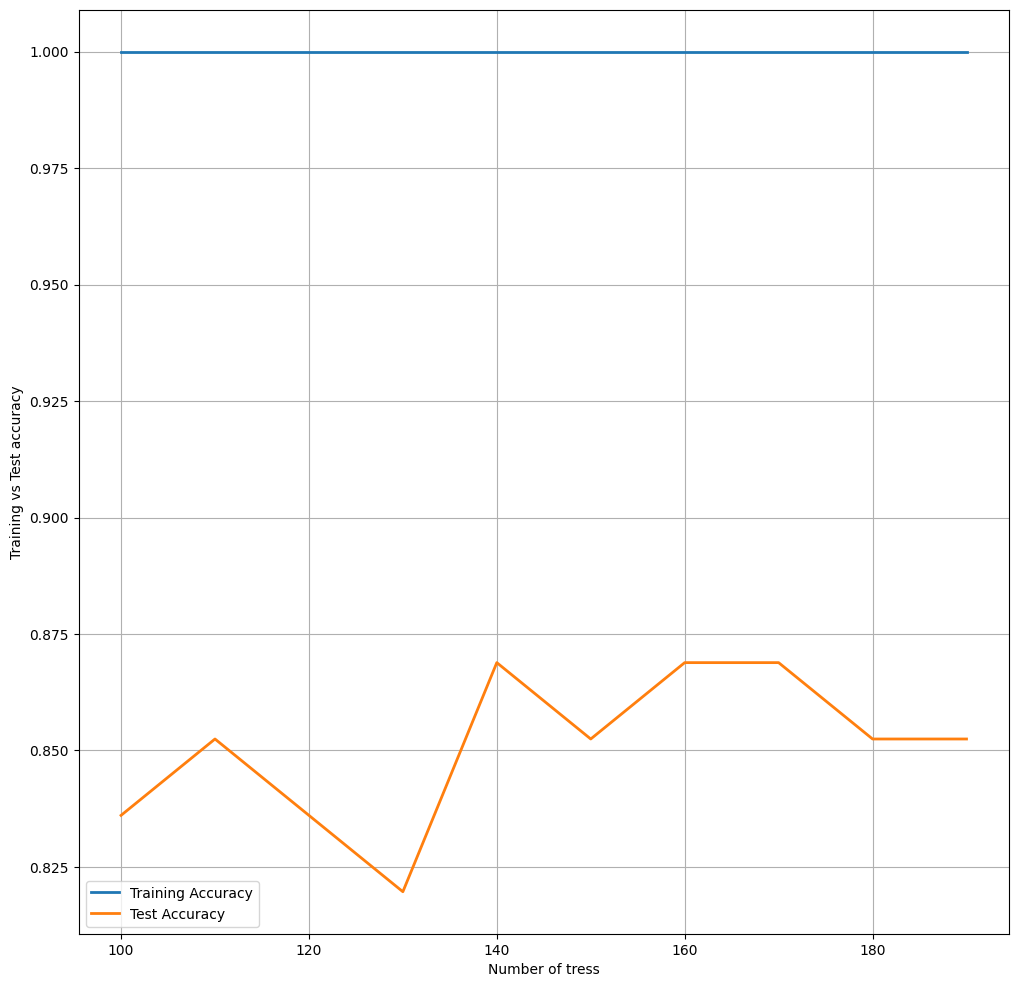

In [41]:
plot(n_estimators_range, train_accuracies, test_accuracies, "Training Accuracy","Test Accuracy")

## Cross Validation Score

This is usually a better indicator of a quality model than a single split accuracy score.

In [42]:
np.random.seed(42)
# test_accuracies = []
cross_val_accuracies = []

for i in n_estimators_range:
    print(f"Traying model with {i} esimators")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    # model score on a single train/test split
    print(f"Model accuracy on test set: {model.score(X_test, y_test)*100}%")

    # mean cross-validation score across 5 different train and test splits
    cross_val_mean  =  np.mean(cross_val_score(model, X, y, cv=5))
    print(f"5 Cross-validation score: {cross_val_mean*100}%")

    cross_val_accuracies.append(cross_val_mean)

    print("")

Traying model with 100 esimators
Model accuracy on test set: 83.60655737704919%
5 Cross-validation score: 82.14754098360656%

Traying model with 110 esimators
Model accuracy on test set: 85.24590163934425%
5 Cross-validation score: 81.16939890710381%

Traying model with 120 esimators
Model accuracy on test set: 83.60655737704919%
5 Cross-validation score: 83.1584699453552%

Traying model with 130 esimators
Model accuracy on test set: 85.24590163934425%
5 Cross-validation score: 83.14207650273224%

Traying model with 140 esimators
Model accuracy on test set: 86.88524590163934%
5 Cross-validation score: 82.48087431693989%

Traying model with 150 esimators
Model accuracy on test set: 85.24590163934425%
5 Cross-validation score: 80.17486338797815%

Traying model with 160 esimators
Model accuracy on test set: 81.9672131147541%
5 Cross-validation score: 80.83060109289617%

Traying model with 170 esimators
Model accuracy on test set: 86.88524590163934%
5 Cross-validation score: 81.82513661202

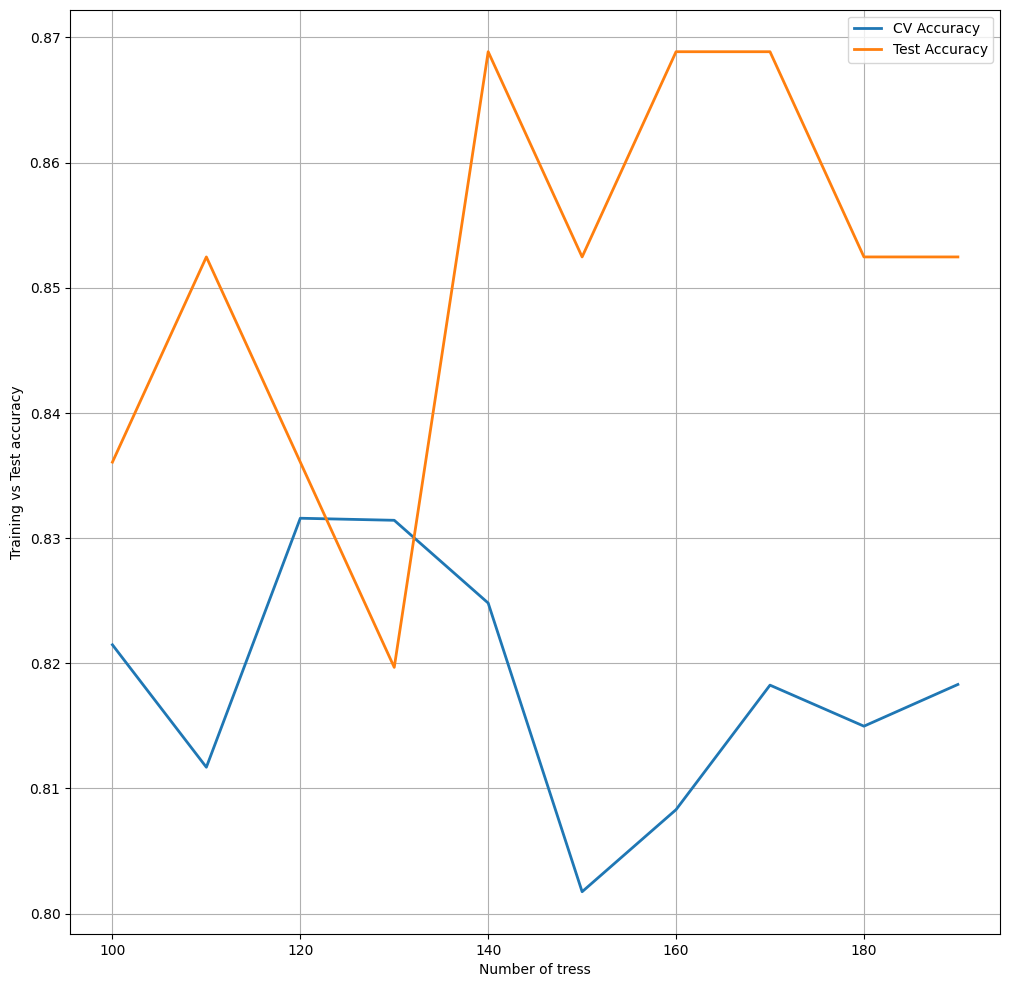

In [43]:
plot(n_estimators_range, cross_val_accuracies, test_accuracies, "CV Accuracy","Test Accuracy")

##  GridSearchCV
Scikit-Learn's sklearn.model_selection.GridSearchCV is a way to search over a set of different hyperparameter values and automatically track which perform the best.

In [44]:
pg = {'n_estimators': [i for i in n_estimators_range]}
pg

{'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190]}

In [45]:
np.random.seed(42)

param_grid = {'n_estimators': [i for i in n_estimators_range]}

grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=1)
grid.fit(X, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]},
             verbose=1)

In [46]:
# Find the best parameters
print(f"The best parameters are: {grid.best_params_}")
print(f"with score of: {grid.best_score_*100}%")

The best parameters are: {'n_estimators': 120}
with score of: 82.81967213114754%


Best Model

extract the best model/estimator with the best_estimator_ attribute

In [49]:

clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=120)

In [50]:
clf = clf.fit(X_train, y_train)

print(f"best model score on single split of data: {clf.score(X_test, y_test)*100}%")

best model score on single split of data: 85.24590163934425%


## Save a model

In [51]:
import pickle

# Save an existing model to file
pickle.dump(clf, open("heart_disease_model.pkl", "wb"))

In [52]:
# Load a saved pickle model and evaluate it
loaded_pickle_model  = pickle.load(open("heart_disease_model.pkl", "rb"))
print(loaded_pickle_model.score(X_test, y_test))

0.8524590163934426
